<div style="text-align: right"> __ Provided on May 27 and due on June 17__ [BRI516, Spring/2019] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python 3.5 
* Please upload your jupyter-notebook file for homework to `Blackboard`
* Please visualize the results as much as possible and discuss your results at least one line of text

#### [Hw05] Implementing a Multilayer Neural Networks using TensorFlow (TF) 1.x (Ch. 13)


##### (1) Data preparation
    (1a) Load the train dataset and test dataset of the MNIST 
    
    (1b) Set the first 55,000 samples in the training dataset as training data, the remaining 5,000 samples in the training dataset as validation data, and 10,000 samples in the test dataset as test data.

<br><br>

##### (2) Multilayer perceptron (MLP) using the low-level API of TF (e.g., p. 429)
    (2a) Implement the multilayer perceptron (MLP) with two hidden layers for classification, and evaluate performance in the following scenarios
    
        (2a-1) for a few choices of hidden nodes per hidden layer
        
        (2a-2) for a few choices of activation functions (i.e., sigmoid, tanh, and ReLU)
    
    (2b) Add the L2-norm regularization of weights to (2a) and evalute performance for a few choices of L2-norm regularization parameters. For this, please pick the best-performing model from (2a)

    (2c) Evaluate the performance of (2b) for a few options of mini-batch sizes 
    
    (2d) Commonly for the results for (2a) - (2c), discuss the results such as by presenting convergence curves of cost and/or accuracy and by exemplifying the misclassified digits
    

##### (0) Setting up

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.contrib.keras as keras

##### (1) Data preparation
(1a) Load the train dataset and test dataset of the MNIST 

In [7]:
(x_data, y_data), (x_test, y_test) = keras.datasets.mnist.load_data()

(1b) Set the first 55,000 samples in the training dataset as training data, the remaining 5,000 samples in the training dataset as validation data, and 10,000 samples in the test dataset as test data.

In [8]:
x_val = x_data[55000:].reshape(5000, -1)
y_val = y_data[55000:]

x_train = x_data[:55000].reshape(55000, -1)
y_train = y_data[:55000]

x_test = x_test.reshape(10000, -1)

##### (2) Multilayer perceptron (MLP) using the low-level API of TF (e.g., p. 429)
(2a) Implement the multilayer perceptron (MLP) with two hidden layers for classification, and evaluate performance in the following scenarios

In [47]:
class MLP:
    def __init__(self, x_dim, hidden_size=128, n_classes=10, learning_rate=0.1, activation='sigmoid'):
        self.input_size = x_dim
        self.hidden_size = hidden_size
        self.n_classes = 10
        self.lr = learning_rate
        self.g = tf.Graph()
        
        if activation == 'sigmoid':
            self.activation = tf.nn.sigmoid
        elif activation == 'tanh':
            self.activation = tf.nn.tanh
        elif activation == 'relu':
            self.activation = tf.nn.relu
        else:
            print('Invalid activation function (set sigmoid)')
            self.activation = tf.sigmoid
        
        ## build the model
        with self.g.as_default():
            self.build()
            
            ## create initializer
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.input_size),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.int32,
                                shape=(None),
                                name = 'y_input')
        y_onehot = tf.cast(tf.one_hot(indices=self.y, depth=self.n_classes), tf.float32)
        #print(self.X)
        #print(self.y)
        
        ## hidden layer1
        ## define weight matrix and bial vector
        w1 = tf.get_variable("w1", shape=(self.input_size, self.hidden_size),
                             initializer=tf.random_normal_initializer())
        b1 = tf.get_variable("b1", shape=(1),
                             initializer=tf.zeros_initializer())
        
        z1 = self.activation(tf.add(tf.matmul(self.X, w1), b1))
        
        ## hidden layer2
        w2 = tf.get_variable("w2", shape=(self.hidden_size, self.n_classes),
                             initializer=tf.random_normal_initializer())
        b2 = tf.get_variable("b2", shape=(1),
                             initializer=tf.random_normal_initializer())
        
        self.outputs = self.activation(tf.add(tf.matmul(z1, w2), b2))
        
        sqr_errors = tf.square(tf.subtract(y_onehot, self.outputs), name='sqr_errors')
        #print(sqr_errors)
        
        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        
        #self.mean_cost = tf.losses.softmax_cross_entropy(y_onehot, self.outputs, reduction=tf.losses.Reduction.MEAN)
        
        optimizer = tf.train.GradientDescentOptimizer(
                        learning_rate=self.lr,
                        name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)    

(2a-1) for a few choices of hidden nodes per hidden layer

======== hidden size : 32 ========
2 epoch | validation MSE : 0.154
4 epoch | validation MSE : 0.153
6 epoch | validation MSE : 0.151
8 epoch | validation MSE : 0.150
10 epoch | validation MSE : 0.149
======== hidden size : 64 ========
2 epoch | validation MSE : 0.112
4 epoch | validation MSE : 0.111
6 epoch | validation MSE : 0.111
8 epoch | validation MSE : 0.110
10 epoch | validation MSE : 0.110
======== hidden size : 128 ========
2 epoch | validation MSE : 0.186
4 epoch | validation MSE : 0.182
6 epoch | validation MSE : 0.179
8 epoch | validation MSE : 0.176
10 epoch | validation MSE : 0.172
======== hidden size : 256 ========
2 epoch | validation MSE : 0.279
4 epoch | validation MSE : 0.268
6 epoch | validation MSE : 0.259
8 epoch | validation MSE : 0.249
10 epoch | validation MSE : 0.240
======== hidden size : 512 ========
2 epoch | validation MSE : 0.240
4 epoch | validation MSE : 0.227
6 epoch | validation MSE : 0.215
8 epoch | validation MSE : 0.204
10 epoch | validation MSE 

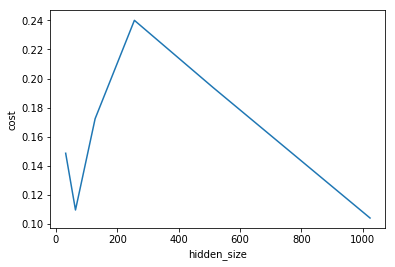

In [10]:
num_epochs = 10
hidden_nodes = [32, 64, 128, 256, 512, 1024]
val_costs = []
for hidden in hidden_nodes:
    mlp = MLP(x_train.shape[1], hidden_size=hidden, n_classes=10)
    
    print('======== hidden size : %d ========' % hidden)
    sess = tf.Session(graph=mlp.g)
    sess.run(mlp.init_op)
    for i in range(1, num_epochs + 1):
        _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                           feed_dict = {mlp.X:x_train,
                                        mlp.y:y_train})
        
        if i % 2 == 0:
            cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                                      mlp.y:y_val})
            print('%d epoch | validation MSE : %.3f' % (i, cost))
            
    cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                              mlp.y:y_val})
    val_costs.append(cost)

min_index = val_costs.index(min(val_costs))
best_hidden = hidden_nodes[min_index]
print('best hidden node : %d' % best_hidden)
plt.plot(hidden_nodes, val_costs, label='cost per hidden nodes')
plt.xlabel('hidden_size')
plt.ylabel('cost')
plt.show()

In [11]:
def plot_cost(train_epochs, train_costs, val_epochs, val_costs):
    fig = plt.figure(figsize=(10, 10))
    
    plt.plot(train_epochs, train_costs, 'b-')
    plt.plot(val_epochs, val_costs, 'k-.')
    plt.show()

In [12]:
def plot_misclassified(X, y, misclassified, predicted):
    fig = plt.figure('misclassified digits', figsize=(10, 10))
    
    for i in range(10):
            subplot = fig.add_subplot(2, 5, i+1)
            
            subplot.set_xticks([])
            subplot.set_yticks([])
            
            subplot.set_title('ground truth : %d\npredicted : %d' % (y[misclassified[i]], predicted[misclassified[i]]))
            
            subplot.imshow(X[misclassified[i], :].reshape((28, 28)), cmap=plt.cm.gray_r)

In [13]:
num_epochs = 10
best_hidden = 1024
train_epochs = []
val_epochs = []
train_costs = []
val_costs = []

mlp = MLP(x_train.shape[1], hidden_size=best_hidden, n_classes=10)


sess = tf.Session(graph=mlp.g)
sess.run(mlp.init_op)
for i in range(1, num_epochs + 1):
    _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                       feed_dict = {mlp.X:x_train,
                                    mlp.y:y_train})
    train_epochs.append(i)
    train_costs.append(cost)
    if i == 1 or i % 2 == 0:
        cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                                  mlp.y:y_val})
        val_epochs.append(i)
        val_costs.append(cost)
        print('%d epoch | validation MSE : %.3f' % (i, cost))
            


output = sess.run(mlp.outputs, feed_dict={mlp.X:x_test,
                                 mlp.y:y_test})
predicted = np.argmax(output, axis=1)
misclassified = np.where(predicted != y_test)[0]

1 epoch | validation MSE : 0.394
2 epoch | validation MSE : 0.374
4 epoch | validation MSE : 0.336
6 epoch | validation MSE : 0.301
8 epoch | validation MSE : 0.269
10 epoch | validation MSE : 0.241


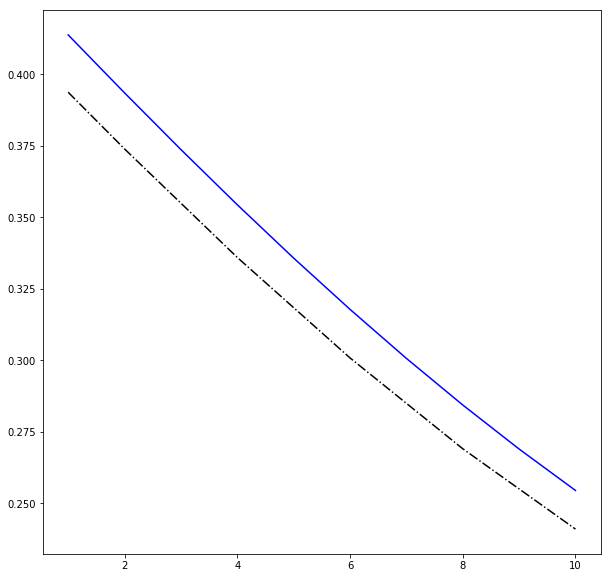

In [14]:
plot_cost(train_epochs, train_costs, val_epochs, val_costs)

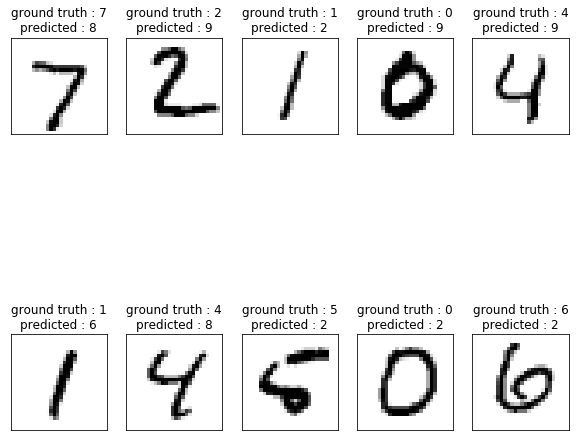

In [15]:
plot_misclassified(x_test, y_test, misclassified, predicted)

(2a-2) for a few choices of activation functions (i.e., sigmoid, tanh, and ReLU)

======== activation function : sigmoid ========
2 epoch | validation MSE : 0.499
4 epoch | validation MSE : 0.496
6 epoch | validation MSE : 0.493
8 epoch | validation MSE : 0.491
10 epoch | validation MSE : 0.488
======== activation function : tanh ========
2 epoch | validation MSE : 1.048
4 epoch | validation MSE : 1.046
6 epoch | validation MSE : 1.045
8 epoch | validation MSE : 1.044
10 epoch | validation MSE : 1.043
======== activation function : relu ========
2 epoch | validation MSE : 0.100
4 epoch | validation MSE : 0.100
6 epoch | validation MSE : 0.100
8 epoch | validation MSE : 0.100
10 epoch | validation MSE : 0.100
bast activation function : relu


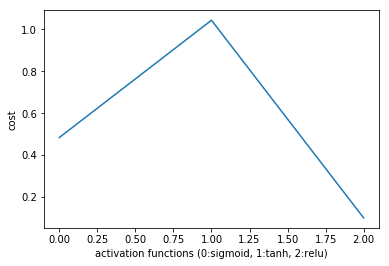

In [48]:
num_epochs = 10
#best_hidden = 1024
activations = ['sigmoid', 'tanh', 'relu']
val_costs = []
for act in activations:
    mlp = MLP(x_train.shape[1], hidden_size=best_hidden, activation=act, n_classes=10)
    
    print('======== activation function : %s ========' % act)
    sess = tf.Session(graph=mlp.g)
    sess.run(mlp.init_op)
    for i in range(1, num_epochs + 1):
        _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                           feed_dict = {mlp.X:x_train,
                                        mlp.y:y_train})
        
        if i % 2 == 0:
            print('%d epoch | validation MSE : %.3f' % (i, cost))
            
    cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                              mlp.y:y_val})
    val_costs.append(cost)

min_index = val_costs.index(min(val_costs))
best_activation = activations[min_index]
print('bast activation function : %s' % best_activation)
plt.plot([0, 1, 2], val_costs, label='cost per activation functions')
plt.xlabel('activation functions (0:sigmoid, 1:tanh, 2:relu)')
plt.ylabel('cost')
plt.show()

In [17]:
num_epochs = 10
#best_hidden = 1024
#best_activation = 'sigmoid'
train_epochs = []
val_epochs = []
train_costs = []
val_costs = []

mlp = MLP(x_train.shape[1], hidden_size=best_hidden, activation=best_activation, n_classes=10)


sess = tf.Session(graph=mlp.g)
sess.run(mlp.init_op)
for i in range(1, num_epochs + 1):
    _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                       feed_dict = {mlp.X:x_train,
                                    mlp.y:y_train})
    train_epochs.append(i)
    train_costs.append(cost)
    if i == 1 or i % 2 == 0:
        cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                                  mlp.y:y_val})
        val_epochs.append(i)
        val_costs.append(cost)
        print('%d epoch | validation MSE : %.3f' % (i, cost))
            


output = sess.run(mlp.outputs, feed_dict={mlp.X:x_test,
                                 mlp.y:y_test})
predicted = np.argmax(output, axis=1)
misclassified = np.where(predicted != y_test)[0]

1 epoch | validation MSE : 0.100
2 epoch | validation MSE : 0.100
4 epoch | validation MSE : 0.100
6 epoch | validation MSE : 0.100
8 epoch | validation MSE : 0.100
10 epoch | validation MSE : 0.100


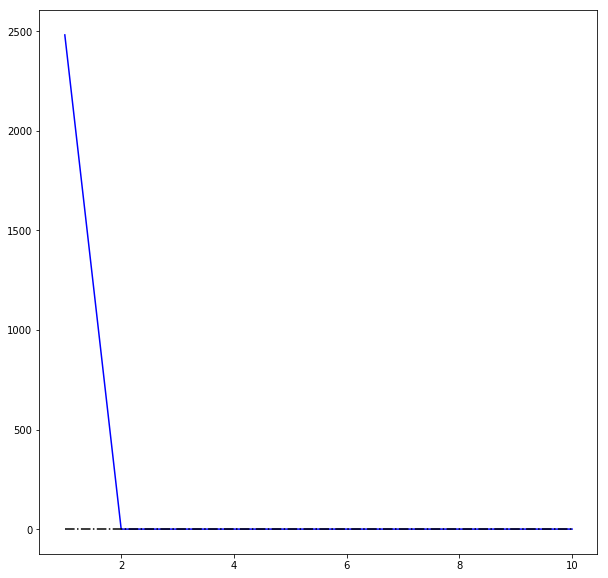

In [18]:
plot_cost(train_epochs, train_costs, val_epochs, val_costs)

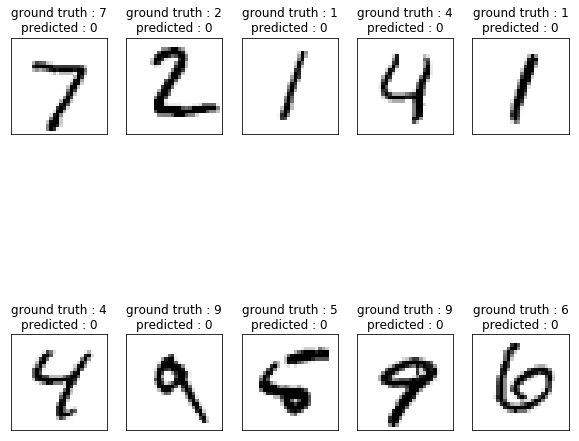

In [19]:
plot_misclassified(x_test, y_test, misclassified, predicted)

(2b) Add the L2-norm regularization of weights to (2a) and evalute performance for a few choices of L2-norm regularization parameters. For this, please pick the best-performing model from (2a)

In [20]:
class L2MLP:
    def __init__(self, x_dim, hidden_size=128, n_classes=10, learning_rate=0.01, weight_decay=0.9, activation='sigmoid'):
        self.input_size = x_dim
        self.hidden_size = hidden_size
        self.n_classes = 10
        self.lr = learning_rate
        self.weight_decay = weight_decay
        self.g = tf.Graph()
        
        if activation == 'sigmoid':
            self.activation = tf.nn.sigmoid
        elif activation == 'tanh':
            self.activation = tf.nn.tanh
        elif activation == 'relu':
            self.activation = tf.nn.relu
        else:
            print('Invalid activation function (set sigmoid)')
            self.activation = tf.sigmoid
        
        ## build the model
        with self.g.as_default():
            self.build()
            
            ## create initializer
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.input_size),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.int32,
                                shape=(None),
                                name = 'y_input')
        y_onehot = tf.one_hot(indices=self.y, depth=self.n_classes)
        #print(self.X)
        #print(self.y)
        
        ## hidden layer1
        ## define weight matrix and bial vector
        w1 = tf.get_variable("w1", shape=(self.input_size, self.hidden_size),
                             initializer=tf.glorot_uniform_initializer())
        b1 = tf.get_variable("b1", shape=(1),
                             initializer=tf.glorot_uniform_initializer())
        
        z1 = self.activation(tf.matmul(self.X, w1) + b1)
        
        ## hidden layer2
        w2 = tf.get_variable("w2", shape=(self.hidden_size, self.n_classes),
                             initializer=tf.glorot_uniform_initializer())
        b2 = tf.get_variable("b2", shape=(1),
                             initializer=tf.glorot_uniform_initializer())
        
        self.outputs = self.activation(tf.matmul(z1, w2) + b2)
        
        sqr_errors = tf.square(tf.cast(y_onehot, tf.float32) - self.outputs, name='sqr_errors')
        mean_sqr_errors = tf.reduce_mean(sqr_errors, name='mean_sqr_errors')
        
        regularizer = (self.weight_decay / 2) * (tf.reduce_mean(tf.square(w1)) + tf.reduce_mean(tf.square(w2)))
        self.mean_cost = tf.add(mean_sqr_errors, regularizer, name='mean_cost') 
        
        optimizer = tf.train.GradientDescentOptimizer(
                        learning_rate=self.lr,
                        name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)    

======== lambda : 0.000001 ========
2 epoch | validation MSE : 0.100
4 epoch | validation MSE : 0.100
6 epoch | validation MSE : 0.100
8 epoch | validation MSE : 0.100
10 epoch | validation MSE : 0.100
======== lambda : 0.000010 ========
2 epoch | validation MSE : 0.100
4 epoch | validation MSE : 0.100
6 epoch | validation MSE : 0.100
8 epoch | validation MSE : 0.100
10 epoch | validation MSE : 0.100
======== lambda : 0.000100 ========
2 epoch | validation MSE : 0.101
4 epoch | validation MSE : 0.101
6 epoch | validation MSE : 0.101
8 epoch | validation MSE : 0.101
10 epoch | validation MSE : 0.101
======== lambda : 0.001000 ========
2 epoch | validation MSE : 0.105
4 epoch | validation MSE : 0.105
6 epoch | validation MSE : 0.105
8 epoch | validation MSE : 0.105
10 epoch | validation MSE : 0.105
======== lambda : 0.010000 ========
2 epoch | validation MSE : 0.203
4 epoch | validation MSE : 0.203
6 epoch | validation MSE : 0.203
8 epoch | validation MSE : 0.203
10 epoch | validation MS

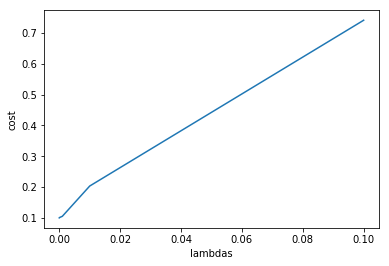

In [21]:
num_epochs = 10
#best_hidden = 1024
#best_activation = 'sigmoid'
lambdas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
val_costs = []
for decay_rate in lambdas:
    mlp = L2MLP(x_train.shape[1], hidden_size=best_hidden, n_classes=10, weight_decay=decay_rate, activation=best_activation)
    
    print('======== lambda : %f ========' % decay_rate)
    sess = tf.Session(graph=mlp.g)
    sess.run(mlp.init_op)
    for i in range(1, num_epochs + 1):
        _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                           feed_dict = {mlp.X:x_train,
                                        mlp.y:y_train})
        
        if i % 2 == 0:
            print('%d epoch | validation MSE : %.3f' % (i, cost))
            
    cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                              mlp.y:y_val})
    val_costs.append(cost)
    
min_index = val_costs.index(min(val_costs))
best_lambda = lambdas[min_index]
print('bast lambda : %f' % lambdas[min_index])
plt.plot(lambdas, val_costs, label='cost per lambda')
plt.xlabel('lambdas')
plt.ylabel('cost')
plt.show()

In [22]:
num_epochs = 10
#best_hidden = 1024
#best_activation = 'sigmoid'
#best_lambda = 0.000001
train_epochs = []
val_epochs = []
train_costs = []
val_costs = []

mlp = L2MLP(x_train.shape[1], hidden_size=best_hidden, activation=best_activation,
            n_classes=10, weight_decay=decay_rate)


sess = tf.Session(graph=mlp.g)
sess.run(mlp.init_op)
for i in range(1, num_epochs + 1):
    _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                       feed_dict = {mlp.X:x_train,
                                    mlp.y:y_train})
    train_epochs.append(i)
    train_costs.append(cost)
    if i == 1 or i % 2 == 0:
        cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                                  mlp.y:y_val})
        val_epochs.append(i)
        val_costs.append(cost)
        print('%d epoch | validation MSE : %.3f' % (i, cost))
            


output = sess.run(mlp.outputs, feed_dict={mlp.X:x_test,
                                 mlp.y:y_test})
predicted = np.argmax(output, axis=1)
misclassified = np.where(predicted != y_test)[0]

1 epoch | validation MSE : 0.965
2 epoch | validation MSE : 0.965
4 epoch | validation MSE : 0.965
6 epoch | validation MSE : 0.965
8 epoch | validation MSE : 0.965
10 epoch | validation MSE : 0.965


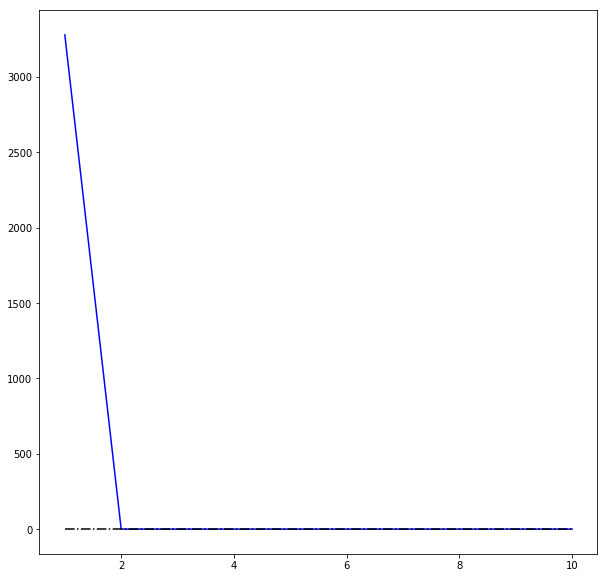

In [23]:
plot_cost(train_epochs, train_costs, val_epochs, val_costs)

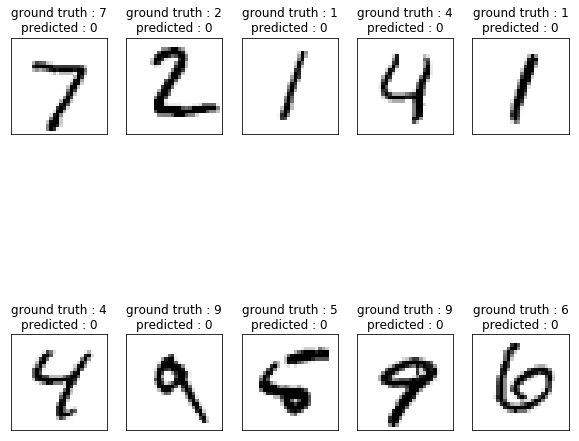

In [24]:
plot_misclassified(x_test, y_test, misclassified, predicted)

(2c) Evaluate the performance of (2b) for a few options of mini-batch sizes 

In [49]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    y = y.reshape(-1, 1)
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size # 5 // 2 = 2
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [51]:
num_epochs = 10
hidden_size = 1024
decay_rate = 1e-5
batch_sizes = [4, 8, 16, 32, 64, 128]
val_costs = []

for batch_size in batch_sizes:
    mlp = L2MLP(x_train.shape[1], hidden_size=hidden_size, n_classes=10, weight_decay=decay_rate, activation=best_activation)
    
    print('======== mini batch size : %d ========' % batch_size)
    sess = tf.Session(graph=mlp.g)
    sess.run(mlp.init_op)
    for i in range(1, num_epochs + 1):
        mini_batches = create_mini_batches(x_train, y_train, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                               feed_dict = {mlp.X:X_mini,
                                            mlp.y:y_mini})
        
        if i % 2 == 0:
            print('%d epoch | validation MSE : %.3f' % (i, cost))
            
    cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                              mlp.y:y_val})
    val_costs.append(cost)
    
min_index = val_costs.index(min(val_costs))
best_batch = batch_sizes[min_index]
print('bast mini batch size : %d' % best_batch)
plt.plot(batch_sizes, val_costs, label='cost per mini batch size')
plt.xlabel('mini batch size')
plt.ylabel('cost')
plt.show()

======== mini batch size : 4 ========


AbortedError: Operation received an exception:Status: 5, message: could not create a primitive descriptor iterator, in file tensorflow/core/kernels/mkl_relu_op.cc:871
	 [[node Relu (defined at <ipython-input-20-299bbbf30bcd>:46) ]]

Caused by op 'Relu', defined at:
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-04e5f1300a60>", line 8, in <module>
    mlp = L2MLP(x_train.shape[1], hidden_size=hidden_size, n_classes=10, weight_decay=decay_rate, activation=best_activation)
  File "<ipython-input-20-299bbbf30bcd>", line 22, in __init__
    self.build()
  File "<ipython-input-20-299bbbf30bcd>", line 46, in build
    z1 = self.activation(tf.matmul(self.X, w1) + b1)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 9196, in relu
    "Relu", features=features, name=name)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\cvpr\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

AbortedError (see above for traceback): Operation received an exception:Status: 5, message: could not create a primitive descriptor iterator, in file tensorflow/core/kernels/mkl_relu_op.cc:871
	 [[node Relu (defined at <ipython-input-20-299bbbf30bcd>:46) ]]


In [ ]:
num_epochs = 10
#best_hidden = 1024
#best_activation = 'sigmoid'
#best_lambda = 0.000001
#best_batch = 32
train_steps = []
val_epochs = []
train_costs = []
val_costs = []

step = 0

mlp = L2MLP(x_train.shape[1], hidden_size=best_hidden, activation=best_activation,
            n_classes=10, weight_decay=best_lambda)


sess = tf.Session(graph=mlp.g)
sess.run(mlp.init_op)
for i in range(1, num_epochs + 1):
    mini_batches = create_mini_batches(x_train, y_train, best_batch)
    for mini_batch in mini_batches:
        _, cost = sess.run([mlp.optimizer, mlp.mean_cost],
                           feed_dict = {mlp.X:x_train,
                                        mlp.y:y_train})
        step += 1
        train_costs.append(cost)
        train_steps.append(step)
        
    if i == 1 or i % 2 == 0:
        cost = sess.run(mlp.mean_cost, feed_dict={mlp.X:x_val,
                                                  mlp.y:y_val})
        val_epochs.append(i)
        val_costs.append(cost)
        print('%d epoch | validation MSE : %.3f' % (i, cost))
            


output = sess.run(mlp.outputs, feed_dict={mlp.X:x_test,
                                 mlp.y:y_test})
predicted = np.argmax(output, axis=1)
misclassified = np.where(predicted != y_test)[0]

In [ ]:
plot_cost(train_steps, train_costs, val_epochs, val_costs)

In [ ]:
plot_misclassified(x_test, y_test, misclassified, predicted)

(2d) Commonly for the results for (2a) - (2c), discuss the results such as by presenting convergence curves of cost and/or accuracy and by exemplifying the misclassified digits